In [250]:
import pandas as pd

In [251]:
news_headlines_path = '/content/cnbc_headlines.csv'
#news_headlines_path = '/content/stock market news headlines.csv'
#, encoding='unicode_escape'
news_headlines_dataFrame = pd.read_csv(news_headlines_path)

In [252]:
news_headlines_dataFrame.shape

(3080, 3)

In [253]:
news_headlines_dataFrame.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


1.   **Extracting Month, Year and Date from DateTime Column**
2.   **sorting datetime wise**
3.   **Dropping Headline (Only keeping detailed news)**
4.   **Renaming Time column to DateTime**
5.   **Renaming Description column to News**

In [254]:
news_headlines_dataFrame = news_headlines_dataFrame.dropna()
news_headlines_dataFrame['Time'] = pd.to_datetime(news_headlines_dataFrame['Time'])
news_headlines_dataFrame['Date'] = news_headlines_dataFrame['Time'].dt.date
news_headlines_dataFrame['News'] = news_headlines_dataFrame['Headlines'] + " " + news_headlines_dataFrame['Description']
news_headlines_dataFrame = news_headlines_dataFrame.drop("Headlines", axis='columns')
news_headlines_dataFrame = news_headlines_dataFrame.drop("Description", axis='columns')
news_headlines_dataFrame.rename(columns = {'Time':'DateTime'}, inplace = True)
news_headlines_dataFrame = news_headlines_dataFrame.sort_values(by=['DateTime'])
news_headlines_dataFrame = news_headlines_dataFrame.drop("DateTime", axis='columns')
news_headlines_dataFrame.shape

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<ipython-input-254-c8c1b43acf4c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  news_headlines_dataFrame['Time'] = pd.to_datetime(news_headlines_dataFrame['Time'])


(2800, 2)

In [255]:
list(news_headlines_dataFrame.columns.values)

['Date', 'News']

In [256]:
news_headlines_dataFrame.head()

,Date,News
3079,2017-12-22,Cramer: Never buy a stock all at once — you'll...
3078,2017-12-22,Cramer: I helped investors through the 2010 fl...
3077,2017-12-22,Cramer says owning too many stocks and too lit...
3075,2017-12-26,Markets lack Christmas cheer According to Kens...
3074,2017-12-27,S&P tends to start new year bullish after this...


**There are Multiple News at same Date, Merging same day news in single row**

In [257]:
# Merging same date news in one row (There are Multiple news in 1 day)
news_headlines_dataFrame['News'] = news_headlines_dataFrame.groupby(['Date'])['News'].transform(lambda x : ' '.join(x))
news_headlines_dataFrame = news_headlines_dataFrame.drop_duplicates('Date', keep='last')
news_headlines_dataFrame.reset_index(drop=True,inplace=True)

In [258]:
news_headlines_dataFrame.head()

,Date,News
0,2017-12-22,Cramer: Never buy a stock all at once — you'll...
1,2017-12-26,Markets lack Christmas cheer According to Kens...
2,2017-12-27,S&P tends to start new year bullish after this...
3,2018-01-02,The major indexes trade lower in January Our d...
4,2018-01-03,Markets after S&P gains 15% in a year Accordin...


In [259]:
news_headlines_dataFrame.shape

(612, 2)

### **Loading vegetables and tomatoes dataset**

In [260]:
csv_file_path = '/content/tomato stock news.csv'
vegetable_news_dataFrame = pd.read_csv(csv_file_path)
vegetable_news_dataFrame

,Date,Title,Description
0,30-Dec-17,Year 2017: The year tomatoes cost Pakistanis R...,(Dunya News) – While the year 2017 comes to a ...
1,7-Oct-17,‘Tomato prices to come down soon’,LAHORE:Tomato prices will come down after Octo...
2,29-Sep-17,Tomato prices expose official mechanism,SAHIWAL: Price regulators have no mechanism to...
3,24-Jul-17,Tomato prices go from Rs 60 to over Rs 90 a kg...,"In the past two weeks, prices of tomato, have ..."
4,17-Jul-17,"Red alert: Tomatoes have become new onions, pr...",Despite wholesale inflation index showing cont...
...,...,...,...
148,30-Mar-19,"Estimates show likely dip in fruit, veggie pro...",PUNE: Farmers in Maharashtra have reasons to w...
149,13-Aug-18,"Tobacco area, output shrink as farmers shift t...","New Delhi, Aug 13 () Tobacco acreage and produ..."
150,26-Jan-19,10 from UP get Padma Shri award,LUCKNOW: Ten of the 94 Padma Shri awardees who...
151,1-Jan-18,Retail inflation for industrial workers up at ...,"New Delhi, Jan 1 () Retail inflation for indus..."


In [261]:
vegetable_news_dataFrame['DateTime']= pd.to_datetime(vegetable_news_dataFrame['Date'])
vegetable_news_dataFrame['Date']= pd.to_datetime(vegetable_news_dataFrame['Date']).dt.date
vegetable_news_dataFrame = vegetable_news_dataFrame.sort_values(by='DateTime')
vegetable_news_dataFrame['News'] = vegetable_news_dataFrame['Title'] + " " + vegetable_news_dataFrame['Description']
vegetable_news_dataFrame.drop(columns=['Title', 'Description','DateTime'], axis=1, inplace=True)
vegetable_news_dataFrame.reset_index(drop=True,inplace=True)
vegetable_news_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    153 non-null    object
 1   News    153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


<ipython-input-261-321549e41bca>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vegetable_news_dataFrame['DateTime']= pd.to_datetime(vegetable_news_dataFrame['Date'])
<ipython-input-261-321549e41bca>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vegetable_news_dataFrame['Date']= pd.to_datetime(vegetable_news_dataFrame['Date']).dt.date


In [262]:
vegetable_news_dataFrame

,Date,News
0,2016-06-15,FM calls meeting as tomato prices blow through...
1,2016-08-23,Shifting Currents! Green Tomato Cars trials th...
2,2017-01-24,"Government announces sops for tomato, potato f..."
3,2017-01-26,"Improving Tomato Flavor, Genetically A sequenc..."
4,2017-02-04,Agriculture sector banks on Budget boost NASHI...
...,...,...
148,2020-10-09,Tomato prices sky-rocket in Pakistan; Imran Kh...
149,2020-10-20,Pakistan braces for fresh protests with Imran ...
150,2020-11-25,Popular tomato growers receive 2020 Bill Best ...
151,2020-12-12,First genome edited tomato variety gets nod fr...


**Merging Stock news dataset with vegetables/tomatoes dataset**

In [263]:
#complete_Dataframe = pd.concat([vegetable_news_dataFrame,news_headlines_dataFrame], axis=0, ignore_index=True)

In [264]:
complete_Dataframe = vegetable_news_dataFrame.merge(news_headlines_dataFrame, on = ['Date'], how = 'outer')

**vegetable_news** ==> News_X (153 values)

**stock_headline_news** ==> News_Y (612 values)

In [265]:
complete_Dataframe = complete_Dataframe.sort_values(by='Date')
indexes = complete_Dataframe[complete_Dataframe["News_x"].notnull() == True]['News_x'].index
complete_Dataframe['News_y'].loc[indexes] = complete_Dataframe['News_x'].loc[indexes] # replacing 153 global trade stock news with vegetables stock news
complete_Dataframe.drop(columns=['News_x'], axis=1, inplace=True)
complete_Dataframe = complete_Dataframe.sort_values(by='Date')
complete_Dataframe.rename(columns = {'News_y':'News'}, inplace = True)
complete_Dataframe['Year'] = pd.to_datetime(complete_Dataframe['Date']).dt.year
complete_Dataframe['Month'] = pd.to_datetime(complete_Dataframe['Date']).dt.month
complete_Dataframe = complete_Dataframe[['Date','Year','Month','News']]
complete_Dataframe

,Date,Year,Month,News
0,2016-06-15,2016,6,FM calls meeting as tomato prices blow through...
1,2016-08-23,2016,8,Shifting Currents! Green Tomato Cars trials th...
2,2017-01-24,2017,1,"Government announces sops for tomato, potato f..."
3,2017-01-26,2017,1,"Improving Tomato Flavor, Genetically A sequenc..."
4,2017-02-04,2017,2,Agriculture sector banks on Budget boost NASHI...
...,...,...,...,...
148,2020-10-09,2020,10,Tomato prices sky-rocket in Pakistan; Imran Kh...
149,2020-10-20,2020,10,Pakistan braces for fresh protests with Imran ...
150,2020-11-25,2020,11,Popular tomato growers receive 2020 Bill Best ...
151,2020-12-12,2020,12,First genome edited tomato variety gets nod fr...


In [266]:
news_headlines_dataFrame = complete_Dataframe

### **News Text Preprocessing**

In [267]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Remove Punctuation**

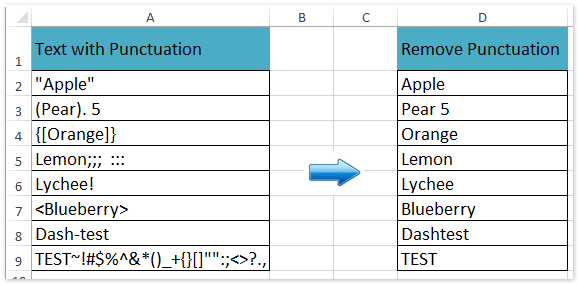

In [268]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

In [269]:
news_headlines_dataFrame['News'] = news_headlines_dataFrame['News'].apply(remove_punctuations)

In [270]:
news_headlines_dataFrame.head()

,Date,Year,Month,News
0,2016-06-15,2016,6,FM calls meeting as tomato prices blow through...
1,2016-08-23,2016,8,Shifting Currents Green Tomato Cars trials th...
2,2017-01-24,2017,1,Government announces sops for tomato potato f...
3,2017-01-26,2017,1,Improving Tomato Flavor Genetically A sequenc...
4,2017-02-04,2017,2,Agriculture sector banks on Budget boost NASHI...


**Word Tokenization**

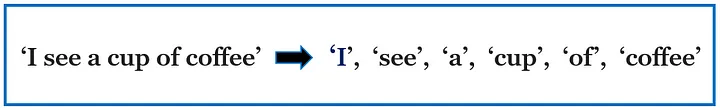

In [271]:
news_headlines_dataFrame['News'] = news_headlines_dataFrame['News'].apply(word_tokenize)

In [272]:
news_headlines_dataFrame.head()

,Date,Year,Month,News
0,2016-06-15,2016,6,"[FM, calls, meeting, as, tomato, prices, blow,..."
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria..."
2,2017-01-24,2017,1,"[Government, announces, sops, for, tomato, pot..."
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se..."
4,2017-02-04,2017,2,"[Agriculture, sector, banks, on, Budget, boost..."


**Stop Word Removal**

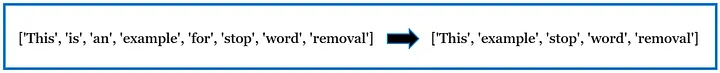

In [273]:
stop_words = set(stopwords.words('english'))
news_headlines_dataFrame['News'] = news_headlines_dataFrame['News'].apply(lambda x: [word for word in x if word not in stop_words])

In [274]:
news_headlines_dataFrame.head()

,Date,Year,Month,News
0,2016-06-15,2016,6,"[FM, calls, meeting, tomato, prices, blow, roo..."
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria..."
2,2017-01-24,2017,1,"[Government, announces, sops, tomato, potato, ..."
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se..."
4,2017-02-04,2017,2,"[Agriculture, sector, banks, Budget, boost, NA..."


**Stemming**

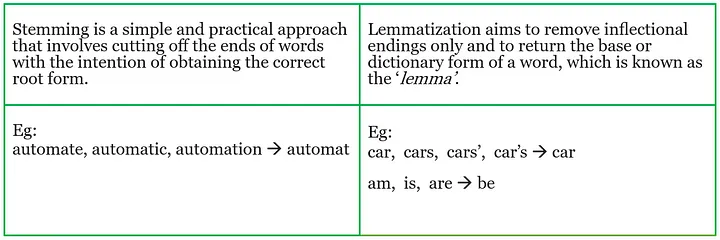

In [275]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply the function to the 'text' column and create a new column 'stemmed_text'
news_headlines_dataFrame['stemmed_News'] = news_headlines_dataFrame['News'].apply(stem_words)

In [276]:
news_headlines_dataFrame.head()

,Date,Year,Month,News,stemmed_News
0,2016-06-15,2016,6,"[FM, calls, meeting, tomato, prices, blow, roo...","[fm, call, meet, tomato, price, blow, roof, de..."
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria...","[shift, current, green, tomato, car, trial, hy..."
2,2017-01-24,2017,1,"[Government, announces, sops, tomato, potato, ...","[govern, announc, sop, tomato, potato, farmer,..."
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se...","[improv, tomato, flavor, genet, a, sequenc, bl..."
4,2017-02-04,2017,2,"[Agriculture, sector, banks, Budget, boost, NA...","[agricultur, sector, bank, budget, boost, nash..."


**Lemmatization**

In [277]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)

    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]

    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
news_headlines_dataFrame['lemmatized_News'] = news_headlines_dataFrame['News'].apply(lemmatize_tokens)

In [278]:
news_headlines_dataFrame.head()

,Date,Year,Month,News,stemmed_News,lemmatized_News
0,2016-06-15,2016,6,"[FM, calls, meeting, tomato, prices, blow, roo...","[fm, call, meet, tomato, price, blow, roof, de...","[FM, call, meeting, tomato, price, blow, roof,..."
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria...","[shift, current, green, tomato, car, trial, hy...","[Shifting, Currents, Green, Tomato, Cars, tria..."
2,2017-01-24,2017,1,"[Government, announces, sops, tomato, potato, ...","[govern, announc, sop, tomato, potato, farmer,...","[Government, announces, sop, tomato, potato, f..."
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se...","[improv, tomato, flavor, genet, a, sequenc, bl...","[Improving, Tomato, Flavor, Genetically, A, se..."
4,2017-02-04,2017,2,"[Agriculture, sector, banks, Budget, boost, NA...","[agricultur, sector, bank, budget, boost, nash...","[Agriculture, sector, bank, Budget, boost, NAS..."


**Only keep 1 column from stemming and lemmatization for features extraction**

In [279]:
news_headlines_dataFrame['preprocessed_news'] = news_headlines_dataFrame['lemmatized_News'].apply(lambda x:' '.join(x))

In [280]:
news_headlines_dataFrame.head()

,Date,Year,Month,News,stemmed_News,lemmatized_News,preprocessed_news
0,2016-06-15,2016,6,"[FM, calls, meeting, tomato, prices, blow, roo...","[fm, call, meet, tomato, price, blow, roof, de...","[FM, call, meeting, tomato, price, blow, roof,...",FM call meeting tomato price blow roof Despite...
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria...","[shift, current, green, tomato, car, trial, hy...","[Shifting, Currents, Green, Tomato, Cars, tria...",Shifting Currents Green Tomato Cars trial Hyun...
2,2017-01-24,2017,1,"[Government, announces, sops, tomato, potato, ...","[govern, announc, sop, tomato, potato, farmer,...","[Government, announces, sop, tomato, potato, f...",Government announces sop tomato potato farmer ...
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se...","[improv, tomato, flavor, genet, a, sequenc, bl...","[Improving, Tomato, Flavor, Genetically, A, se...",Improving Tomato Flavor Genetically A sequence...
4,2017-02-04,2017,2,"[Agriculture, sector, banks, Budget, boost, NA...","[agricultur, sector, bank, budget, boost, nash...","[Agriculture, sector, bank, Budget, boost, NAS...",Agriculture sector bank Budget boost NASHIK Th...


---

In [281]:
news_headlines_dataFrame.columns.values

array(['Date', 'Year', 'Month', 'News', 'stemmed_News', 'lemmatized_News',
       'preprocessed_news'], dtype=object)

In [282]:
from gensim.models import Word2Vec
import gensim
import numpy as np

**Skip-gram is a technique for creating word embeddings that focuses on predicting surrounding words based on a specific word, also called the “target word.”**

In [283]:
# Create Skip Gram model
word2vec_features_extractor = gensim.models.Word2Vec(news_headlines_dataFrame['stemmed_News'],
                                                     min_count=1, vector_size=10,
                                                     window=5, sg=1)
features = word2vec_features_extractor.wv
skip_gram_features_extractor = features
news_headlines_dataFrame['features'] = news_headlines_dataFrame['stemmed_News'].apply(lambda a: features[a])
news_headlines_dataFrame['features'] = news_headlines_dataFrame['features'].apply(lambda a: np.sum(a,axis=0))

In [284]:
news_headlines_dataFrame.head()

,Date,Year,Month,News,stemmed_News,lemmatized_News,preprocessed_news,features
0,2016-06-15,2016,6,"[FM, calls, meeting, tomato, prices, blow, roo...","[fm, call, meet, tomato, price, blow, roof, de...","[FM, call, meeting, tomato, price, blow, roof,...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,2016,8,"[Shifting, Currents, Green, Tomato, Cars, tria...","[shift, current, green, tomato, car, trial, hy...","[Shifting, Currents, Green, Tomato, Cars, tria...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,2017,1,"[Government, announces, sops, tomato, potato, ...","[govern, announc, sop, tomato, potato, farmer,...","[Government, announces, sop, tomato, potato, f...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,2017,1,"[Improving, Tomato, Flavor, Genetically, A, se...","[improv, tomato, flavor, genet, a, sequenc, bl...","[Improving, Tomato, Flavor, Genetically, A, se...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,2017,2,"[Agriculture, sector, banks, Budget, boost, NA...","[agricultur, sector, bank, budget, boost, nash...","[Agriculture, sector, bank, Budget, boost, NAS...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."


In [285]:
news_headlines_dataFrame['features'].iloc[0].shape

(10,)

---

In [286]:
news_dataframe = news_headlines_dataFrame

**Dropping the text preprocessed columns with datetime (only Date is required for time series analysis)**

In [287]:
news_dataframe = news_headlines_dataFrame.drop(['News','lemmatized_News'], axis=1)

In [288]:
news_dataframe.head()

,Date,Year,Month,stemmed_News,preprocessed_news,features
0,2016-06-15,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."


In [289]:
news_dataframe.rename(columns = {'preprocessed_news':'News'}, inplace = True)

In [290]:
news_dataframe.shape

(709, 6)

In [291]:
news_dataframe.head()

,Date,Year,Month,stemmed_News,News,features
0,2016-06-15,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."


In [292]:
news_dataframe.tail()

,Date,Year,Month,stemmed_News,News,features
148,2020-10-09,2020,10,"[tomato, price, sky, rocket, pakistan, imran, ...",Tomato price sky rocket Pakistan Imran Khan go...,"[-2.7214155, 45.01598, 94.64682, -20.767988, 2..."
149,2020-10-20,2020,10,"[pakistan, brace, fresh, protest, imran, khan,...",Pakistan brace fresh protest Imran Khan pressu...,"[11.802048, 11.356937, 25.368542, -10.61154, 5..."
150,2020-11-25,2020,11,"[popular, tomato, grower, receiv, 2020, bill, ...",Popular tomato grower receive 2020 Bill Best A...,"[66.07141, 66.02351, 118.52171, -88.73039, 44...."
151,2020-12-12,2020,12,"[first, genom, edit, tomato, varieti, get, nod...",First genome edit tomato variety get nod minis...,"[63.81527, 40.308605, 106.36873, -68.38072, 39..."
152,2020-12-19,2020,12,"[tomato, spot, wilt, orthotospoviru, tomato, s...",Tomato spot wilt orthotospovirus tomato spot w...,"[5.5581026, 5.4975324, 11.765632, -9.414455, 6..."


### **Preprocessing for Time series (Tomato prices) Dataset**

### **Tomato price dataset**

In [293]:
tomato_dataset_path = '/content/Tomato.csv'
#news_headlines_path = '/content/stock market news headlines.csv'
#, encoding='unicode_escape'
tomato_dataset_dataFrame = pd.read_csv(tomato_dataset_path)

In [294]:
tomato_dataset_dataFrame.columns.values

array(['Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Market'],
      dtype=object)

In [295]:
tomato_dataset_dataFrame = tomato_dataset_dataFrame.dropna()
tomato_dataset_dataFrame['Date'] = pd.to_datetime(tomato_dataset_dataFrame['Date']).dt.date
tomato_dataset_dataFrame = tomato_dataset_dataFrame.sort_values(by=['Date'])
tomato_dataset_dataFrame.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


**End date and start date is selected from news headlines dataset**

In [296]:
# startdate = pd.to_datetime("2013-06-19").date()
# enddate = pd.to_datetime("2013-11-07").date()
startdate = news_dataframe.iloc[[0, -1],0].tolist()[0]
enddate = news_dataframe.iloc[[0, -1],0].tolist()[-1]

tomato_dataset_dataFrame = tomato_dataset_dataFrame[(tomato_dataset_dataFrame['Date'] > startdate) & (tomato_dataset_dataFrame['Date'] < enddate)]
tomato_dataset_dataFrame.head()

,Date,Unit,Minimum,Maximum,Average,Market
984,2016-06-16,Kg,30,38,34.0,Tomato
985,2016-06-17,Kg,40,50,45.0,Tomato
986,2016-06-18,Kg,25,40,32.5,Tomato
987,2016-06-19,Kg,40,50,45.0,Tomato
988,2016-06-20,Kg,40,50,45.0,Tomato


**Only keeping Average Prices and multiplying with 3.35 exchange rate (prices are in INR)**

In [297]:
tomato_dataset_dataFrame.reset_index(inplace=True,drop=True)
tomato_dataset_dataFrame = tomato_dataset_dataFrame.drop(['Minimum','Maximum'], axis=1)
tomato_dataset_dataFrame.rename(columns = {'Average':'Price'}, inplace = True)

Exchange_rate = 3.35
tomato_dataset_dataFrame['Price'] = tomato_dataset_dataFrame['Price'].apply(lambda x: x * Exchange_rate)

In [298]:
tomato_dataset_dataFrame.head()

,Date,Unit,Price,Market
0,2016-06-16,Kg,113.900,Tomato
1,2016-06-17,Kg,150.750,Tomato
2,2016-06-18,Kg,108.875,Tomato
3,2016-06-19,Kg,150.750,Tomato
4,2016-06-20,Kg,150.750,Tomato


In [299]:
tomato_dataset_dataFrame = tomato_dataset_dataFrame.drop(['Unit','Market'], axis=1)

In [300]:
tomato_dataset_dataFrame.head()

,Date,Price
0,2016-06-16,113.900
1,2016-06-17,150.750
2,2016-06-18,108.875
3,2016-06-19,150.750
4,2016-06-20,150.750


In [301]:
news_dataframe.head()

,Date,Year,Month,stemmed_News,News,features
0,2016-06-15,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."


**Merging News headlines Dataframe with tomatoes prices Dataset**

In [302]:
complete_Dataframe = tomato_dataset_dataFrame.merge(news_dataframe, on = ['Date'], how = 'right')

In [303]:
complete_Dataframe

,Date,Price,Year,Month,stemmed_News,News,features
0,2016-06-15,NaN,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,150.750,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,83.750,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,67.000,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,65.325,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."
...,...,...,...,...,...,...,...
704,2020-10-09,142.375,2020,10,"[tomato, price, sky, rocket, pakistan, imran, ...",Tomato price sky rocket Pakistan Imran Khan go...,"[-2.7214155, 45.01598, 94.64682, -20.767988, 2..."
705,2020-10-20,209.375,2020,10,"[pakistan, brace, fresh, protest, imran, khan,...",Pakistan brace fresh protest Imran Khan pressu...,"[11.802048, 11.356937, 25.368542, -10.61154, 5..."
706,2020-11-25,150.750,2020,11,"[popular, tomato, grower, receiv, 2020, bill, ...",Popular tomato grower receive 2020 Bill Best A...,"[66.07141, 66.02351, 118.52171, -88.73039, 44...."
707,2020-12-12,175.875,2020,12,"[first, genom, edit, tomato, varieti, get, nod...",First genome edit tomato variety get nod minis...,"[63.81527, 40.308605, 106.36873, -68.38072, 39..."


In [304]:
complete_Dataframe['Price']

0          NaN
1      150.750
2       83.750
3       67.000
4       65.325
        ...   
704    142.375
705    209.375
706    150.750
707    175.875
708        NaN
Name: Price, Length: 709, dtype: float64

**At very few dates (4-5) tomatoes prices are missing, filling values using mean value of prices**

In [305]:
# calculate the mean of each column
mean = complete_Dataframe['Price'].mean()

# fill NaN values with the mean of each column
complete_Dataframe['Price'].fillna(mean, inplace=True)

In [306]:
complete_Dataframe['Price']

0      124.735384
1      150.750000
2       83.750000
3       67.000000
4       65.325000
          ...    
704    142.375000
705    209.375000
706    150.750000
707    175.875000
708    124.735384
Name: Price, Length: 709, dtype: float64

In [307]:
complete_Dataframe

,Date,Price,Year,Month,stemmed_News,News,features
0,2016-06-15,124.735384,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,150.750000,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,83.750000,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,67.000000,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,65.325000,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."
...,...,...,...,...,...,...,...
704,2020-10-09,142.375000,2020,10,"[tomato, price, sky, rocket, pakistan, imran, ...",Tomato price sky rocket Pakistan Imran Khan go...,"[-2.7214155, 45.01598, 94.64682, -20.767988, 2..."
705,2020-10-20,209.375000,2020,10,"[pakistan, brace, fresh, protest, imran, khan,...",Pakistan brace fresh protest Imran Khan pressu...,"[11.802048, 11.356937, 25.368542, -10.61154, 5..."
706,2020-11-25,150.750000,2020,11,"[popular, tomato, grower, receiv, 2020, bill, ...",Popular tomato grower receive 2020 Bill Best A...,"[66.07141, 66.02351, 118.52171, -88.73039, 44...."
707,2020-12-12,175.875000,2020,12,"[first, genom, edit, tomato, varieti, get, nod...",First genome edit tomato variety get nod minis...,"[63.81527, 40.308605, 106.36873, -68.38072, 39..."


**Time Series Analysis of Tomato prices**

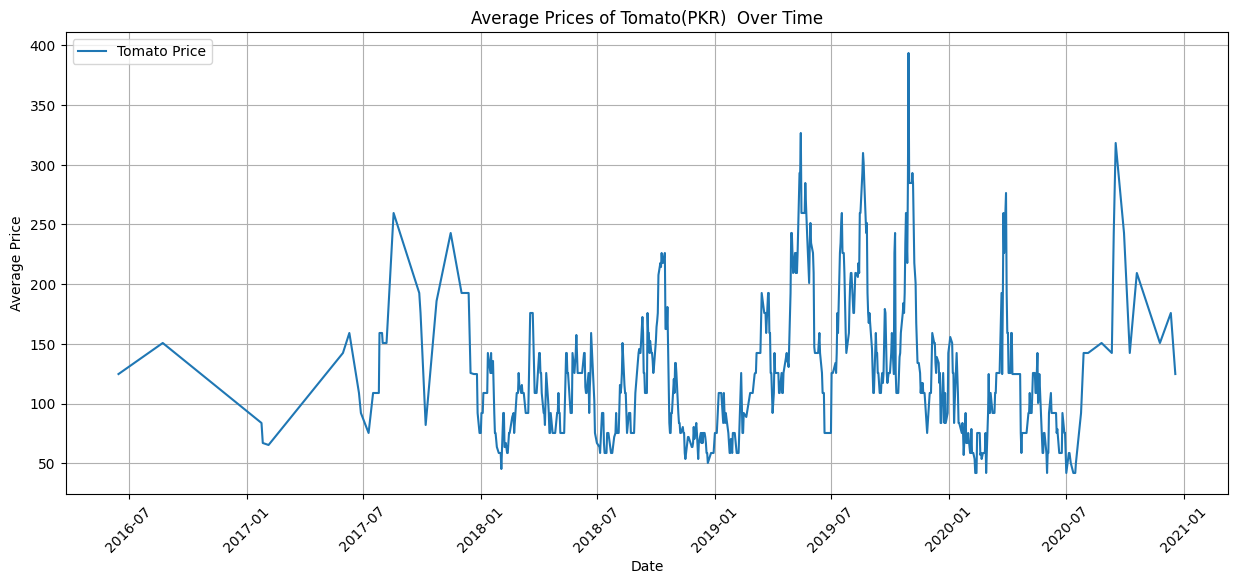

In [308]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(complete_Dataframe['Date'],complete_Dataframe['Price'],label='Tomato Price')
plt.title('Average Prices of Tomato(PKR)  Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [309]:
half_period = int(len(complete_Dataframe['Price'])/2)

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(complete_Dataframe['Price'],
                            model ='additive',period = half_period)

In [310]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

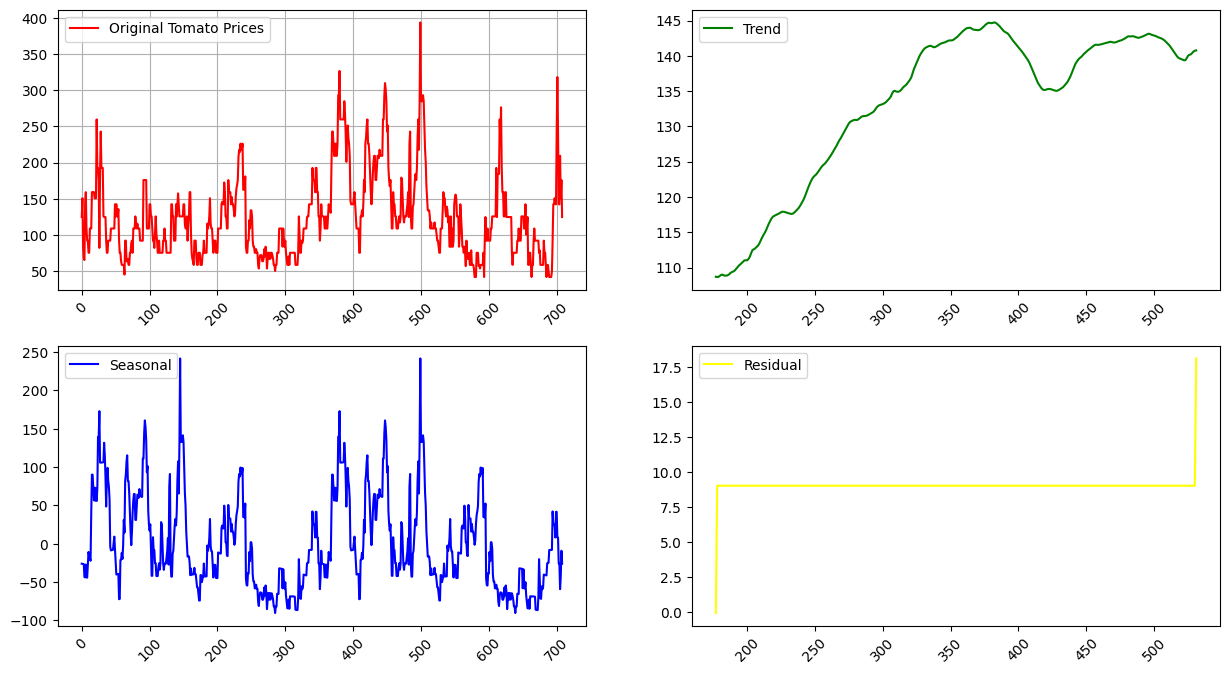

In [311]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.plot(complete_Dataframe['Price'], label='Original Tomato Prices', color='red')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.subplot(222)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.subplot(223)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.subplot(224)
plt.plot(residual, label='Residual', color='yellow')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

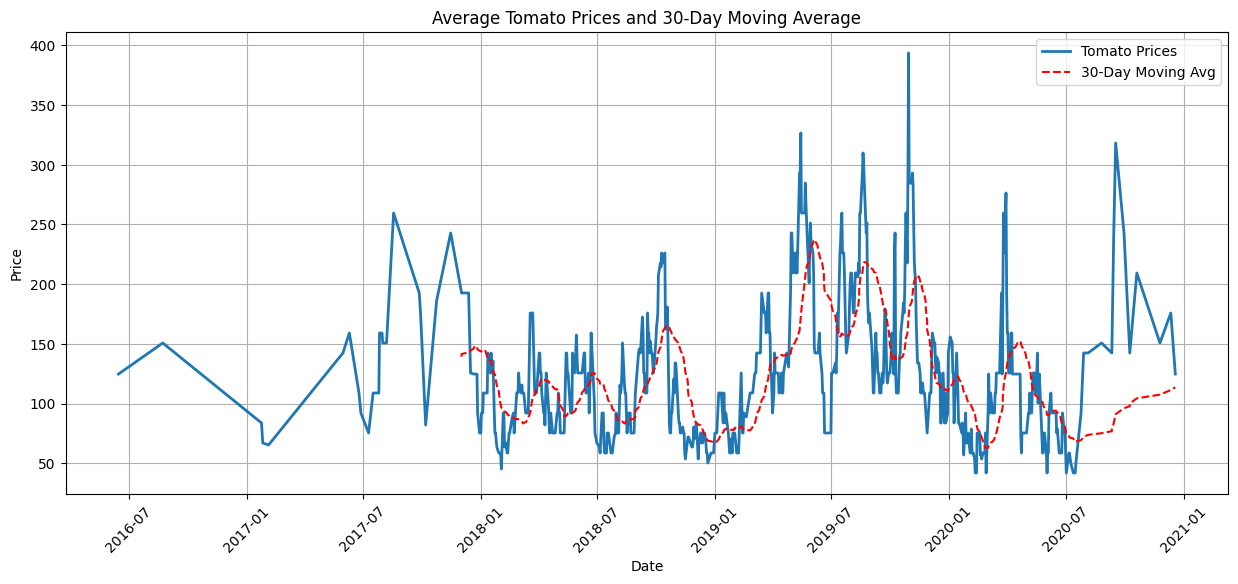

In [312]:
window = 30

plt.figure(figsize=(15, 6))
plt.plot(complete_Dataframe['Date'],complete_Dataframe['Price'],
         label='Tomato Prices', linewidth=2)

plt.plot(complete_Dataframe['Date'],complete_Dataframe['Price'].rolling(window=window).mean(),
         label=f'{window}-Day Moving Avg', color='Red',
         linestyle='--')

plt.title(f'Average Tomato Prices and {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

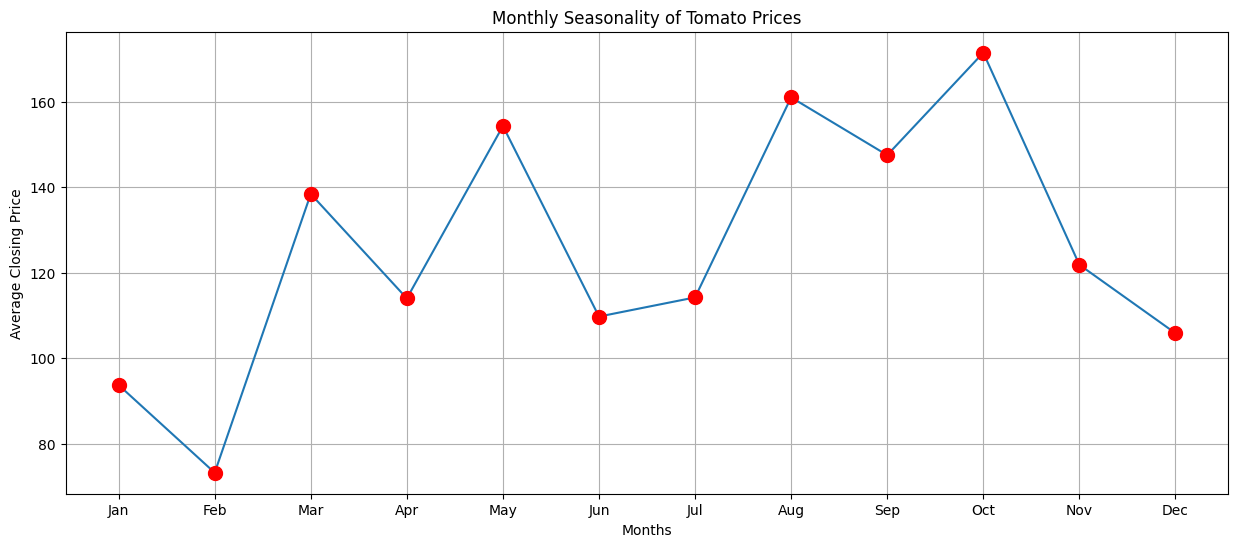

In [313]:
monthly_average = complete_Dataframe.groupby('Month')['Price'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o', ms = 10, mec = 'r', mfc = 'r')
plt.title(f'Monthly Seasonality of Tomato Prices')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [314]:
complete_Dataframe

,Date,Price,Year,Month,stemmed_News,News,features
0,2016-06-15,124.735384,2016,6,"[fm, call, meet, tomato, price, blow, roof, de...",FM call meeting tomato price blow roof Despite...,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,2016-08-23,150.750000,2016,8,"[shift, current, green, tomato, car, trial, hy...",Shifting Currents Green Tomato Cars trial Hyun...,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,2017-01-24,83.750000,2017,1,"[govern, announc, sop, tomato, potato, farmer,...",Government announces sop tomato potato farmer ...,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,2017-01-26,67.000000,2017,1,"[improv, tomato, flavor, genet, a, sequenc, bl...",Improving Tomato Flavor Genetically A sequence...,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,2017-02-04,65.325000,2017,2,"[agricultur, sector, bank, budget, boost, nash...",Agriculture sector bank Budget boost NASHIK Th...,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."
...,...,...,...,...,...,...,...
704,2020-10-09,142.375000,2020,10,"[tomato, price, sky, rocket, pakistan, imran, ...",Tomato price sky rocket Pakistan Imran Khan go...,"[-2.7214155, 45.01598, 94.64682, -20.767988, 2..."
705,2020-10-20,209.375000,2020,10,"[pakistan, brace, fresh, protest, imran, khan,...",Pakistan brace fresh protest Imran Khan pressu...,"[11.802048, 11.356937, 25.368542, -10.61154, 5..."
706,2020-11-25,150.750000,2020,11,"[popular, tomato, grower, receiv, 2020, bill, ...",Popular tomato grower receive 2020 Bill Best A...,"[66.07141, 66.02351, 118.52171, -88.73039, 44...."
707,2020-12-12,175.875000,2020,12,"[first, genom, edit, tomato, varieti, get, nod...",First genome edit tomato variety get nod minis...,"[63.81527, 40.308605, 106.36873, -68.38072, 39..."


In [315]:
word2vec_features = complete_Dataframe.iloc[:,6:]

In [316]:
word2vec_features

,features
0,"[0.8520193, 13.024523, 25.033562, -7.868621, 9..."
1,"[18.121078, 17.39961, 34.52517, -17.518414, 5...."
2,"[10.190147, 21.309284, 53.729603, -14.57859, 8..."
3,"[2.5907502, 3.2319221, 3.8597245, -2.815384, 2..."
4,"[20.456757, 18.192123, 63.02049, -22.817467, 1..."
...,...
704,"[-2.7214155, 45.01598, 94.64682, -20.767988, 2..."
705,"[11.802048, 11.356937, 25.368542, -10.61154, 5..."
706,"[66.07141, 66.02351, 118.52171, -88.73039, 44...."
707,"[63.81527, 40.308605, 106.36873, -68.38072, 39..."


In [317]:
from sklearn.decomposition import PCA

In [318]:
features_list = np.asarray(word2vec_features).reshape(-1).tolist()

features_array = np.asarray([feature.tolist() for feature in features_list])

features_array.shape

(709, 10)

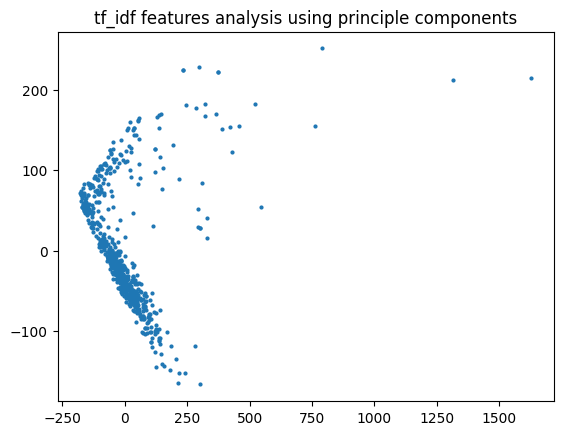

In [319]:
pca = PCA(n_components=2).fit(features_array)
data2D = pca.transform(features_array)
plt.scatter(data2D[:,0], data2D[:,1], s=4)
plt.title('tf_idf features analysis using principle components')
plt.show()

**Training LSTM Model**

In [320]:
import numpy as np

In [321]:
tomato_prices = np.array(complete_Dataframe['Price'])
news_headlines_features = features_array

**Applying normalization scaler**

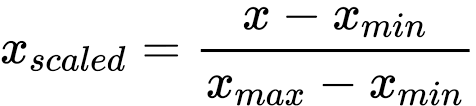

In [322]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalized_tomato_prices =scaler.fit_transform(tomato_prices.reshape(-1,1))
normalized_tomato_prices = normalized_tomato_prices.reshape(-1)

In [323]:
normalized_tomato_prices.shape

(709,)

In [324]:
news_headlines_features.shape

(709, 10)

In [325]:
# Split into training and testing sets
training_dataset_size = int(len(normalized_tomato_prices) * 0.8)  # 80% for training # 20% for validation

train_dataset = normalized_tomato_prices[:training_dataset_size]
train_news_features = news_headlines_features[:training_dataset_size]

test_dataset =  normalized_tomato_prices[training_dataset_size:]
test_news_features =  news_headlines_features[training_dataset_size:]

In [326]:
def to_sequences(price_dataset, news_headlines_features, seq_size=1):
    x = []
    y = []
    news_features = []

    for i in range(len(price_dataset)-seq_size-0):
        window = price_dataset[i:(i+seq_size)]
        x.append(window)
        y.append(price_dataset[i+seq_size])
        news_features.append(news_headlines_features[i+seq_size,:])
        pass

    return np.array(x),np.array(y),np.array(news_features)

In [327]:
window_size = 30

train_historical_price_features, y_train, train_news_features = to_sequences(train_dataset, train_news_features, window_size)
test_historical_price_features, y_test, test_news_features = to_sequences(test_dataset, test_news_features, window_size)

In [328]:
print("Prices Training set size:-")
print(train_historical_price_features.shape)
print(train_news_features.shape)
print(y_train.shape)

print()

print("Prices validation set size:-")
print(test_historical_price_features.shape)
print(test_news_features.shape)
print(y_test.shape)

Prices Training set size:-
(537, 30)
(537, 10)
(537,)

Prices validation set size:-
(112, 30)
(112, 10)
(112,)


**Concatenating historical prices with news word2vec features**

In [329]:
x_train = np.concatenate([train_historical_price_features,train_news_features],axis=1)
x_test = np.concatenate([test_historical_price_features,test_news_features],axis=1)

print(x_train.shape)
print(x_test.shape)

(537, 40)
(112, 40)


**Building Regression Model from TensorFlow Keras Architecture**

In [330]:
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [331]:
def linear_regression_model(features_size = 40):

  # Define model
  model = Sequential()
  # Define input shape
  model.add(Input(shape = (features_size,)))
  # Add 2 hidden layers
  model.add(Dense(16, activation = 'relu'))
  model.add(Dense(16, activation = 'relu'))
  # Add Linear layer
  model.add(Dense(1))
  # Compile the model
  #model.compile(optimizer='adam',loss='mean_squared_error')
  return model
  pass

In [332]:
model = linear_regression_model(features_size = x_train.shape[1])
model.compile(optimizer=Adam(learning_rate=0.01),loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                656       
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 945 (3.69 KB)
Trainable params: 945 (3.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [333]:
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our lstm model
model.fit(x_train, y_train,
          validation_data=(x_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [early_stopping])

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 24.2004 - mean_squared_error: 24.2004 - mean_absolute_error: 3.2189 - val_loss: 8.6054 - val_mean_squared_error: 8.6054 - val_mean_absolute_error: 1.6021
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 3.1551 - mean_squared_error: 3.1551 - mean_absolute_error: 1.0877 - val_loss: 4.4426 - val_mean_squared_error: 4.4426 - val_mean_absolute_error: 1.2532
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 3.1397 - mean_squared_error: 3.1397 - mean_absolute_error: 1.0316 - val_loss: 15.0242 - val_mean_squared_error: 15.0242 - val_mean_absolute_error: 2.3996
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 6.3696 - mean_squared_error: 6.3696 - mean_absolute_error: 1.4722 - val_loss: 4.5886 - val_mean_squared_error: 4.5886 - val_mean_absolute_error: 1.6883
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 1.0661 - mean_squared_

In [334]:
# Let's do the prediction and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [335]:
# Transform back to original form
non_normalized_train_predict = scaler.inverse_transform(train_predict)
non_normalized_validation_predict = scaler.inverse_transform(test_predict)

In [336]:
# Transform labels ground truths back to original form
non_normalized_train_labels = scaler.inverse_transform([y_train])
non_normalized_validation_labels = scaler.inverse_transform([y_test])

In [337]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

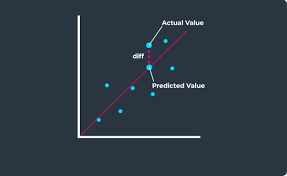

**Root Mean Squared Error**

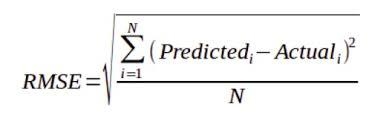

In [338]:
#Root Mean Squared Error

print('Root Mean Squared Error (RMSE)\n')

# Calculate train data RMSE
trainScore = math.sqrt(mean_squared_error(non_normalized_train_labels.reshape(-1),non_normalized_train_predict.reshape(-1)))
print('Train Score: %.2f RMSE' % (trainScore))
# Calculate test data RMSE
testScore = math.sqrt(mean_squared_error(non_normalized_validation_labels.reshape(-1),non_normalized_validation_predict.reshape(-1)))
print('Validtion Score: %.2f RMSE' % (testScore))

Root Mean Squared Error (RMSE)

Train Score: 67.44 RMSE
Validtion Score: 89.43 RMSE


**Mean Absolute Error**

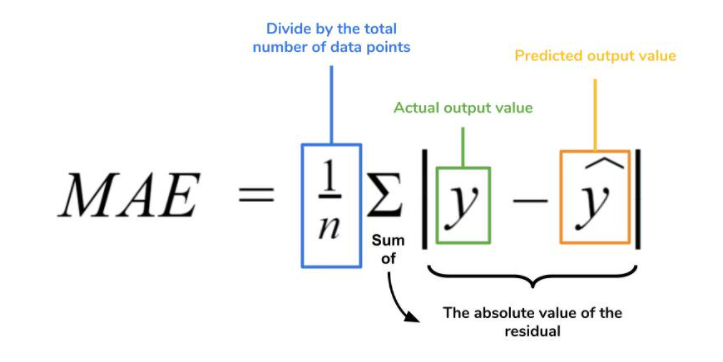

In [339]:
actual = non_normalized_validation_labels.reshape(-1)
calculated = non_normalized_validation_predict.reshape(-1)

# calculate Mean Absolute Error MAE
error = mean_absolute_error(actual, calculated)

# display
print("Mean absolute error (MAE) : " + str(error))

Mean absolute error (MAE) : 61.71866254681921


**Mean Squared Error**

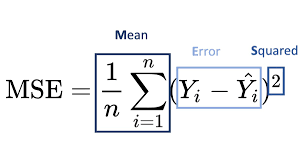

In [340]:
# Given values
Y_true = actual # Y_true = Y (original values)

# calculated values
Y_pred = calculated  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(Y_true,Y_pred)

# display
print("Mean Squared error (MSE) : " + str(mse))

Mean Squared error (MSE) : 7998.284493389816


**Plotting Predictions**

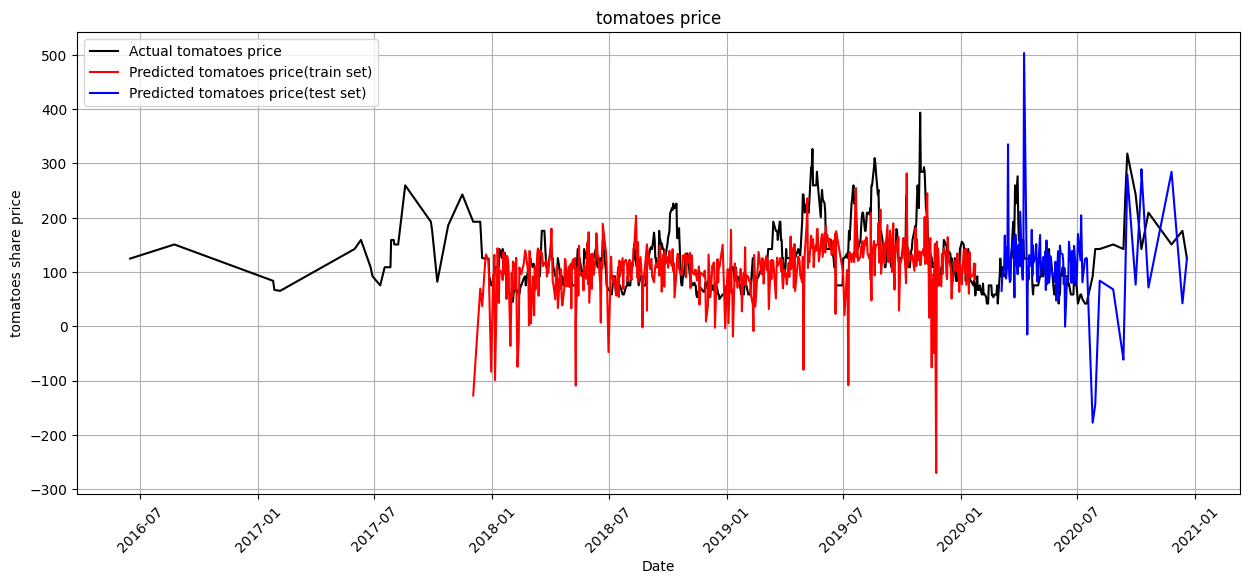

In [341]:
# shift train predictions for plotting
#we must shift the predictions so that they align on the x-axis with the original dataset.
trainPredictPlot = np.empty_like(tomato_prices)
trainPredictPlot[:] = np.nan
trainPredictPlot[window_size:len(non_normalized_train_predict)+window_size] = non_normalized_train_predict.reshape(-1)

# shift test predictions for plotting
testPredictPlot = np.empty_like(tomato_prices)
testPredictPlot[:] = np.nan
testPredictPlot[len(non_normalized_train_predict)+(window_size*2):len(tomato_prices)] = non_normalized_validation_predict.reshape(-1)

# plot baseline and predictions
plt.figure(figsize=(15, 6))
plt.plot(complete_Dataframe['Date'],tomato_prices, color='black', label=f"Actual tomatoes price")
plt.plot(complete_Dataframe['Date'],trainPredictPlot, color='red', label=f"Predicted tomatoes price(train set)")
plt.plot(complete_Dataframe['Date'],testPredictPlot,color='blue', label=f"Predicted tomatoes price(test set)")
plt.title("tomatoes price")
plt.xlabel("Date")
plt.ylabel("tomatoes share price")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

---
**Inference**

In [411]:
latest_headline = complete_Dataframe['News'].iloc[-25]

In [412]:
latest_headline

'The S P 500 could get ugly near future Jim Cramer warns The S P 500 could rid make break moment short term Mad Money host say Cramer lightning round BlackRock buy Mad Money host Jim Cramer ring lightning round bell mean give answer caller stock question rapid speed Jim Cramer deciphers speculative blue chip stock drive market The whole market upended pandemic line shift Mad Money host say'

**text preprocessing**

In [413]:
def preprocess_text(news_text):

  news_text = remove_punctuations(news_text)
  news_text = word_tokenize(news_text)
  news_text = [word for word in news_text if word not in stop_words]
  news_text = stem_words(news_text)

  return news_text

In [414]:
text_stemmed_tokens = preprocess_text(latest_headline)
word2vec_text_embeddings_features = skip_gram_features_extractor[text_stemmed_tokens]
word2vec_text_embeddings_features = np.sum(word2vec_text_embeddings_features,axis=0)

In [415]:
word2vec_text_embeddings_features

array([ 16.207685 ,   0.3373394,  50.09889  , -33.198822 ,  42.11728  ,
        52.22577  ,  96.525085 ,  30.748957 , -52.075478 , -68.23648  ],
      dtype=float32)

In [416]:
last_30_days_prices = test_dataset[len(test_dataset)-30:]

In [417]:
print('last 30 days prices ==> ',scaler.inverse_transform([last_30_days_prices]))

last 30 days prices ==>  [[ 58.625      58.625      92.125      75.375      75.375      58.625
   41.875      58.625      58.625      50.25       41.875      41.875
   41.875      41.875      50.25       92.125     142.375     142.375
  150.75      142.375     142.375     242.875     318.25      242.875
  142.375     142.375     209.375     150.75      175.875     124.7353835]]


In [418]:
print(word2vec_text_embeddings_features.shape)
print(last_30_days_prices.shape)

(10,)
(30,)


In [419]:
combined_features = np.concatenate([last_30_days_prices,word2vec_text_embeddings_features],axis=0)
combined_features = np.expand_dims(combined_features,axis=0)

In [420]:
combined_features.shape

(1, 40)

In [421]:
price_prediction = model.predict(combined_features)

1/1 [==============================] - 0s 22ms/step


In [422]:
original_price_prediction = scaler.inverse_transform(price_prediction)

print('predicted price is  ==>',original_price_prediction.reshape(-1)[0])

predicted price is  ==> 125.4128
